In [1]:
%matplotlib inline
import random, pylab, math, numpy

In this homework session, you will do a few calculations in quantum mechanics. We consider the harmonic and the anharmonic oscillator, use matrix squaring and, at the end, perform two Quantum Monte Carlo simulation.

# A
## Preparation program 1

In [31]:
Names = {}
Names['Albert'] = 'Einstein'
Names['Satyendra'] = 'Bose'
Names['Richard'] = 'Feynman'
Names['Ludwig'] = 'Boltzmann'
# checkpoint 1
for name in Names: 
    print name, Names[name]
a = Names.pop('Albert')
# checkpoint 2
del Names['Richard']
# checkpoint 3
L = Names.keys()
M = Names.values()
#checkpoint 4
b = 'Wolfgang' in Names
#checkpoint 5

Ludwig Boltzmann
Satyendra Bose
Albert Einstein
Richard Feynman


## Preparation program 2

In [13]:
import numpy
a = numpy.array([[1, 2, 3], [4, 5, 6]])
b = numpy.array([[1, 2], [3, 4], [5, 6]])
c = numpy.dot(a, b)
d = numpy.dot(b, a)
e = d * 2
f = numpy.diag(c)
g = numpy.diag(c).sum()

## Preparation program 3

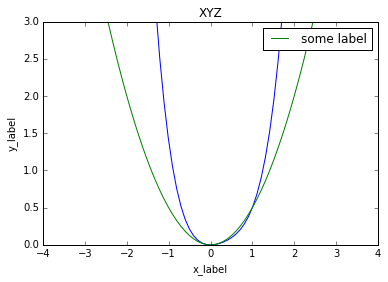

In [46]:
def V(x):
    pot = x ** 2 / 2 + cubic * x ** 3 + quartic * x ** 4
    return pot

def Energy(n, cubic, quartic):
    return (n + 0.5 - 15.0 / 4.0 * cubic **2 * (n ** 2 + n + 11.0 / 30.0) 
            + 3.0 / 2.0 * quartic * (n ** 2 + n + 1.0 / 2.0))

def Z(cubic, quartic, beta, n_max):
    Z = sum(math.exp(-beta * Energy(n, cubic, quartic)) for n in range(n_max + 1))
    return Z

cubic = -0.45
quartic = 0.45
x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)]
y = [V(a) for a in x]
pylab.plot(x, y)
cubic = 0.0
quartic = 0.0
y = [V(a) for a in x]
pylab.title('XYZ')
pylab.xlabel('x_label')
pylab.ylabel('y_label')
pylab.plot(x, y, label='some label')
pylab.legend()
pylab.axis([-4.0, 4.0, 0.0, 3.0])
pylab.show()

## A1

## Questions:


1. At Checkpoint 1, what are the keys and values of the dictionary Names?
2. At Checkpoint 2, what is a? What are the keys and values now?
3. At Checkpoint 3, what is the new content of Names?
4. At Checkpoint 4, what datatype are L and M (they are not dictionaries)?
5. At Checkpoint 5, what is b?
6. In our example, the keys of the dictionaries are first names, or in other words strings. Can the keys be
floats (real numbers), like 3.1415? Can the keys be lists, like L =[1.4,1.5]? Same question for the values, can they be integers, floats or lists?

1. Dictionary is: {'Albert':'Einstein','Satyendra':'Bose','Richard':'Feynman','Ludwig':'Boltzmann'} where keys are :'Albert', 'Satyendra', 'Richard', 'Ludwig',  and respective values are 'Einstein','Bose','Feynman','Boltzmann'.

2. a is value of key 'Albert' so that a is string 'Einstein', pop also deleted 'Albert' from dictionary so that dictionary is : {'Satyendra':'Bose','Richard':'Feynman','Ludwig':'Boltzmann'}.

3. Well we removed 'Richard':'Feynman' from dict so that dictionary is: {'Satyendra':'Bose','Ludwig':'Boltzmann'}.

4. Method Names.keys() return list of objects that are used as keys so that list of strinkgs with frist names 'Satyendra','Ludwig'], method Names.values() do the same for values in dictionary ['Bose','Boltzmann'], btw order in list is determined by the hash of objects used as keys ... so that it could be different then order in which data are inserted into dictionary.

5. b is bolean value which is true if any object in keys of Names is equal to string 'Wolfgang' ... which in this case happends to be False.

6. Well in python key have to be an object with methods to create hash (for faster finding of key in dict), must have method equal == and method !=, so strings, integers, float numbers can be keys, however list cant since they lact hash method. For values well list or other dictionaries ... or generaly any object could be used as value.

## A2

## Questions about Preparation program 2

We are concerned with numpy, a convenient numerical library inside Python. 
1. a is a numpy array. Can you confirm that it stands for the matrix
1 2 3
4 5 6
with elements a_00 = 1, a_10 = 4, a_01 = 2, a_11 = 5, a_02 = 3, a_12 = 6?
2. Write down all elements of b.
3. What is numpy.dot? Write down all elements of c.
4. Write down all elements of d. Can you confirm that a.b differs from b.a?
5. Explain e, write down all its elements.
6. The trace of a matrix is defined as the sum of its diagonal elements. How is it computed in Preparation program 2? Write down the trace of the matrix c.

In [16]:
## well numpy array is similar to any N-dimensional list so we can just print numbers by specifiing indexes
print a[0][0],a[1][0],a[0][1], a[1][1], a[0][2], a[1][2]
## or just print numpy array in default formating
print a

1 4 2 5 3 6
[[1 2 3]
 [4 5 6]]


In [21]:
## well just use that array is iterable
print b
for i in numpy.nditer(b):
    print i,

1 2 3 4 5 6


In [26]:
## well it differ base on dinemsion of arrays used in dot method, for 2D array its simple matrix multiplication (if it is possible base on number of rows/columns)
print c

[[22 28]
 [49 64]]


In [27]:
## well ...
print d
## since a and b differ in dimensions also resulting matrixes differ ind number of rows/columns

[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


In [28]:
## well operator * in between array and scalar value is simple scalar multiplication of all elements of array ... in this case times 2
print e

[[ 18  24  30]
 [ 38  52  66]
 [ 58  80 102]]


In [30]:
## well method .diag(x) return list of diagonal elements of matrix
print f
## well and sum() is function that take object (in this case list) and calculate sum of its elements
print g

[22 64]
86


## A2

## Questions about Preparation program 1

1. Can you confirm that the preparation program computes the volume of the unit hypersphere in dimensions from 1
to 19? (Yes/No answer)
2. Explain how to modify this program to compute the volume of the hypersphere of radius r.
3. Extend the Preparation Program into a graphics version, and plot the quantity "Vol1_s" for all dimensions d from 1 through 200. Use linear scale in $x$ and logarithmic scale in $y$. Compute and display the numerical values Vol1_s(5), Vol1_s(20), Vol1_s(200), as you will need them later.

Well for results see HW4 I think :)

## A3

In physics, 'harmonic' means 'quadratic'. The harmonic oscillator thus corresponds to a potential $\frac{1}{2} x^2$ and, as we know, the quantum harmonic oscillator has energy levels $E_0 = 1/2$, $E_1 = 3/2$, $E_2 = 5/2$,...
Preparation program 3 provides the anharmonic corrections to the harmonic potential. Run and modify this program to answer the following questions:

## Questions

1. The Preparation program 3 is able to plot harmonic and anharmonic potentials. Which values of the parameters correspond to the harmonic oscillator? What is the condition for the potential to be $+ \infty$ for $x \to \pm \infty$?
2. Plot the potential for the harmonic case and for cubic = -0.5 and quartic = 0.5. Make sure that you provide the  missing curve labels.
3. The Preparation program 3 provides the 'perturbation theoretical' corrections for the change of the
energy levels of the anharmonic oscillator for *very small* values of cubic and quartic corrections.
Plot the energy values $E_n$ for 0 < quartic = -cubic < 1. The program is already written, but you should
provide appropriate title, axis labels and good labels for the individual curves.
4. Much work has gone into computing the perturbation theoretical formula for $E_n$ (contained in our
function Energy). Given that the exact eigenvalues satisfy: $\forall x , V(x) > 0 \Rightarrow E_n > 0$, can you show that
the formula ceases to be valid quite quickly?
5. The Preparation program 3 is also able to compute the partition function $Z = \sum_n \exp ( - \beta
E_n)$ where $\beta = 1/(k_b T)$ is the inverse temperature. Can you confirm (numerically) that the partition
function for the harmonic oscillator equals $Z^{harm} (\beta) = 1/(2 \sinh(\beta/2))$?

NB: The perturbation-theoretical calculation is performed, for example,in Landau Lifshitz: "Quantum
Mechanics (vol 3)", exercise 3 of chap 38. No need to look this reference up for this exercise.

1. Well potential is harmonic when variable cubic = 0 and quartic = 0, so that there is only quadratic term, otherwise potential is anharmonic. Well for quartic term being larger then 0 and when cubic = 0 and quartic = 0.

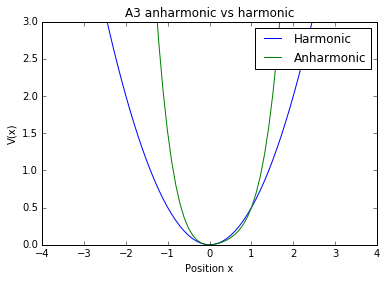

In [47]:
## 2. 
cubic = 0.0
quartic = 0.0
y_harmonic = [V(a) for a in x]
pylab.plot(x, y_harmonic, label='Harmonic')


cubic = -0.5
quartic = 0.5
y_anharmonic = [V(a) for a in x]
pylab.plot(x, y_anharmonic, label='Anharmonic')


pylab.title('A3 anharmonic vs harmonic')
pylab.xlabel('Position x')
pylab.ylabel('V(x)')
pylab.legend()
pylab.axis([-4.0, 4.0, 0.0, 3.0])
pylab.show()

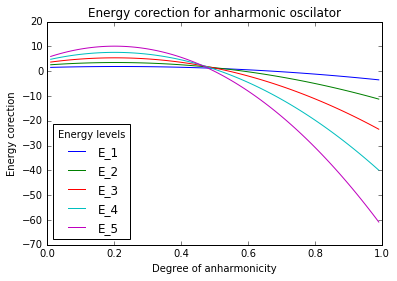

In [58]:
ratio = [i * 0.01 for i in xrange(1,100)]

E_1 = [Energy(1, -i, i) for i in ratio]
pylab.plot(ratio, E_1, label='E_1')

E_2 = [Energy(2, -i, i) for i in ratio]
pylab.plot(ratio, E_2, label='E_2')

E_3 = [Energy(3, -i, i) for i in ratio]
pylab.plot(ratio, E_3, label='E_3')

E_4 = [Energy(4, -i, i) for i in ratio]
pylab.plot(ratio, E_4, label='E_4')

E_5 = [Energy(5, -i, i) for i in ratio]
pylab.plot(ratio, E_5, label='E_5')


pylab.title('Energy corection for anharmonic oscilator')
pylab.xlabel('Degree of anharmonicity')
pylab.ylabel('Energy corection')
pylab.legend(loc=3, title='Energy levels')
pylab.show()

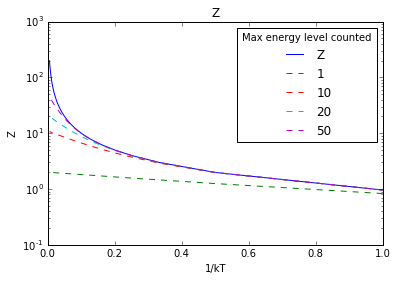

We can see that as temperature rise and 1/kT decrease higher energy levels are excited so that more energy levels have to by counted to reproduce exact results.


In [82]:
def Z_harm(beta):
    return 1.0/(2.0 * math.sinh(0.5 * beta))

#k_b = 1.38064852 * (10 ** -23)
k_b = 1
betas = [1.0/(k_b * T) for T in xrange(1,200)]

Z_analytical = [Z_harm(beta) for beta in betas]
pylab.plot(betas, Z_analytical, label='Z')

Z_1 = [Z(0.0, 0.0, beta, 1) for beta in betas]
pylab.plot(betas, Z_1, label='1', ls='--')

Z_10 = [Z(0.0, 0.0, beta, 10) for beta in betas]
pylab.plot(betas, Z_10, label='10', ls='--')

Z_20 = [Z(0.0, 0.0, beta, 20) for beta in betas]
pylab.plot(betas, Z_20, label='20', ls='--')

Z_50 = [Z(0.0, 0.0, beta, 50) for beta in betas]
pylab.plot(betas, Z_50, label='50', ls='--')


pylab.title('Z')
pylab.xlabel('1/kT')
pylab.ylabel('Z')
pylab.yscale('log')
pylab.legend(loc=1, title='Max energy level counted')
pylab.show()

print "We can see that as temperature rise and 1/kT decrease higher energy levels are excited so that more energy levels have to by counted to reproduce exact results."

# B

In part B, you will redo calculations for the harmonic oscillator and verify the consistency of the sum over wavefunctions and energy eigenvalues, Matrix squaring and Quantum Monte Carlo.

NB: The density matrix is given by
$$\rho(x, x', \beta) = \sum_n \exp(- \beta E_n) \psi_n(x) \psi_n^*(x')$$
where the asterisk (*) denotes complex conjugation and is without action in our case. The diagonal density matrix corresponds to x = x'. Note that there is a '=' sign in the above formula, without a normalizing factor.

NNB: The Trotter decomposition is given by
$$\rho(x, x', \beta) = \exp(-\beta V(x)/2) \rho^{free}(x, x', \beta) exp(-\beta V(x')/2)$$
as discussed in class. Notice that there is a "one half" from the Trotter decomposition, and another "one half" from the potential V(x) = x^2/2.

# B1

Modify the below program so that it computes the diagonal density matrix at inverse temperatures beta. Furthermore, compute the partition function Z using the three formulas:

$Z(\beta) = \sum_n \exp(-\beta E_n)$ (general, any quantum system)

$Z(\beta) = \int dx \rho(x, x, \beta)$

$Z(\beta) = Z^{harm} (\beta) = 1/(2 \sinh(\beta/2))$ (harmonic oscillator only)

## Questions

1. Compute the partition function using the three methods for $\beta = 2$. Print out your results.
2. The normalized probability to be at position x is given by $\pi(x) = K \rho(x, x, \beta)$. What is the proportinality constant $K$ if we require that $\int_{-\infty}^\infty \pi(x) = 1$? Modify your program so that it outputs the normalized $\pi(x)$ in a figure. Use labels for plots, as in Section A3 (titles, axis labels, graph labels). Display your figure for beta = 2.

In [177]:
import math
n_states = 40
Energies = [0.5 + i for i in range(n_states)]
grid_x = [i * 0.2 for i in range(-25, 26)]
psi = {}
psi_sq = {}

for x in grid_x:
    psi[x] = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]
    psi_sq[x] = [(math.exp(-x ** 2 / 2.0) / math.pi ** 0.25)**2]
    psi[x].append(math.sqrt(2.0) * x * psi[x][0])
    psi_sq[x].append((math.sqrt(2.0) * x * psi[x][0])**2)
    for n in range(2, n_states):
        psi[x].append(math.sqrt(2.0 / n) * x * psi[x][n - 1] -
        math.sqrt((n - 1.0) / n) * psi[x][n - 2])
        psi_sq[x].append((math.sqrt(2.0 / n) * x * psi[x][n - 1] -
        math.sqrt((n - 1.0) / n) * psi[x][n - 2])**2)

normalise = {}
for n in range(n_states):
    normalise[n] = 0.0
    for x in grid_x:
        normalise[n]+=psi_sq[x][n]
    
beta = 2.0        
x_prob = {}
    
for x in grid_x:
    suma = 0.0
    for n in range(n_states):
        suma+=math.exp(-beta*Energies[n])*(psi[x][n])**2
    x_prob[x]=suma

print "Results from direct sumation:     Z(beta) = %f"%(sum([math.exp(-beta*E_n) for E_n in Energies]))
print "Results from analytical formula:  Z(beta) = %f"%(Z_harm(beta))
print "Results from density matrix:      Z(beta) = %f"%(sum([0.2*x_prob[x] for x in grid_x]))

Results from direct sumation:     Z(beta) = 0.425459
Results from analytical formula:  Z(beta) = 0.425459
Results from density matrix:      Z(beta) = 0.425459


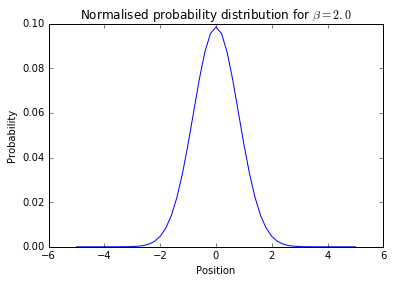

In [241]:
K=sum([x_prob[x] for x in grid_x])

norm_x_prob = [ x_prob[x]/K for x in grid_x]

pylab.plot(grid_x, norm_x_prob)


pylab.title(r'Normalised probability distribution for $\beta = 2.0$')
pylab.xlabel('Position')
pylab.ylabel('Probability')
pylab.show()

## B2

Modify the program below (using the technique of section A2) so that it computes the diagonal density matrix and the
partition function, using the two methods:

$$Z(\beta) = \int dx \rho(x, x, \beta)$$ (general, any quantum system)

$$Z(\beta) = Z^{harm} (\beta) = 1/(2 \sinh(\beta/2))$$ (harmonic oscillator only)

NB: This requires just a few-line change in the program.


## Questions

1. Briefly explain how the Trotter decomposition is implemented in this program. Also, briefly discuss the choice of the initial value of beta_tmp.
2. Compute the partition function using the two methods for beta between $1/16$ and $8$. print out your results. Comment on the precision obtained.
3. Modify your program so that it outputs the normalized $\pi(x)$ (normalize your data, do not use an analytic formula). Display a figure, and compare (on the same plot) with the exact formula:
$$\pi^{exact} (x) = \sqrt{\tanh (\beta/2)} / \sqrt{\pi} \exp(- x^2 \tanh(\beta/2))$$

Display this figure for $\beta = 8$. Explain which starting value of beta_tmp appears ok for you.

1. Trotter decomposition is implemented by matrix squaring. To obtain results for diferent temperatures we can use convolution but we have to start from known density matrix. At high temperaures we can derive density matrix of free particle and by using Trotter decompostion we can combine it with harmonic potential. So that we need to start at high temperatures where we can define our starting solution of particle in harmonic potential and by convolution obtain results fro lower temperatures.

Beta = 0.062500 	 Z_trotter(beta) = 12.695647 	 Z_harm(beta) = 15.997396
Beta = 0.125000 	 Z_trotter(beta) = 7.372750 	 Z_harm(beta) = 7.994794
Beta = 0.250000 	 Z_trotter(beta) = 3.932177 	 Z_harm(beta) = 3.989602
Beta = 0.500000 	 Z_trotter(beta) = 1.977857 	 Z_harm(beta) = 1.979318
Beta = 1.000000 	 Z_trotter(beta) = 0.959554 	 Z_harm(beta) = 0.959517
Beta = 2.000000 	 Z_trotter(beta) = 0.425482 	 Z_harm(beta) = 0.425459
Beta = 4.000000 	 Z_trotter(beta) = 0.137872 	 Z_harm(beta) = 0.137860
Beta = 8.000000 	 Z_trotter(beta) = 0.018325 	 Z_harm(beta) = 0.018322


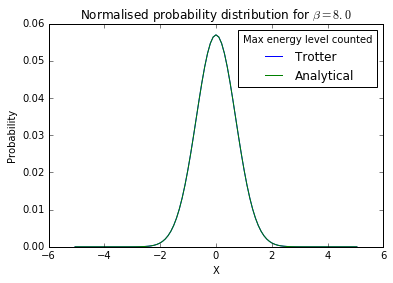

In [238]:
def distrib(x, beta):
    return ((1/math.sqrt(math.pi))*(math.sqrt(math.tanh(0.5*beta)))*(math.exp(-math.tanh(0.5*beta)*x**2)))

def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

def rho_harmonic_trotter(grid, beta):
    return numpy.array([[rho_free(x, xp, beta) *
                         numpy.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) 
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)]
beta_tmp = 2.0 ** (-5)
beta = 2.0 ** (3)

rho = rho_harmonic_trotter(x, beta_tmp)

while beta_tmp < beta:
    rho = numpy.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0
    diagonal_rho = numpy.diag(rho)
    exact = [distrib(i,beta_tmp) for i in x]    
    print "Beta = %f \t Z_trotter(beta) = %f \t Z_harm(beta) = %f"%(beta_tmp, dx*numpy.diag(rho).sum(), Z_harm(beta_tmp))

diagonal_rho_norm = [i/sum(diagonal_rho) for i in diagonal_rho]
exact_norm = [i/sum(exact) for i in exact]
pylab.plot(x, diagonal_rho_norm, label='Trotter')
pylab.plot(x, exact_norm, label='Analytical')

pylab.title(r'Normalised probability distribution for $\beta = 8.0$')
pylab.xlabel('X')
pylab.ylabel('Probability')
pylab.legend(loc=1, title='Max energy level counted')
pylab.show()

## B3

Modify the program below, so that it generates a histogram of positions x. 

*Attention*: use the "if step % separation == 0: " construction to avoid data overflow in the notebook if you wish to uncomment the print statement below.

## Questions

1. By moving from one configuration to another, does this algorithm use the Trotter decomposition? Explain in a few words the "factors of two" in old_weight and new_weight (wouldn't one expect a "0.25 dtau
* ...", rather that the "0.5 * ... ", because of the .5 factor from Trotter, and the .5 factor from the potential?
2. Does this program compute the partition function?
3. Does this program compute the off-diagonal density matrix?
4. Produce a histogram for $\pi(x)$ at inverse temperature $\beta = 2$. Compare (on the same figure) with the exact formula:
$$\pi^{exact} (x) = \sqrt{\tanh (\beta/2)} / \sqrt{\pi} \exp(- x^2 \tanh(\beta/2))$$
5. Specify the value of dtau you used in your code

 #3.  Since we can get probability distribution with respect to position which is basicly trace of density matrix we can  obtain partition function.
 #4.  Off diagonal elements are not calculated here.
 #6.  dtau = 0.25

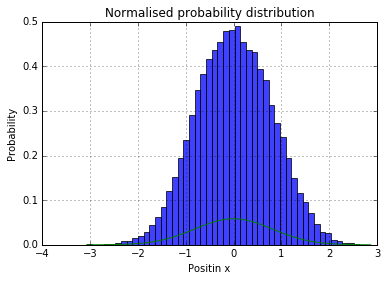

In [259]:
def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))


beta = 2.0
N = 8
dtau = beta / N
delta = 1.0
n_steps = 100000
x = [0.0] * N
data = []

for step in range(n_steps):
    k = random.randint(0, N - 1)
    knext, kprev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-delta, delta)
    old_weight = (rho_free(x[knext], x[k], dtau) *
                  rho_free(x[k], x[kprev], dtau) *
                  math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight = (rho_free(x[knext], x_new, dtau) *
                  rho_free(x_new, x[kprev], dtau) *
                  math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        data.append(x_new)
    #print x


# the histogram of the data
n, bins, patches = pylab.hist(data, 50, normed=1, facecolor='blue', alpha=0.75)

exactx = [distrib(i,beta) for i in bins]
exactx_norm = [i/sum(exactx) for i in exactx]
pylab.plot(bins, exactx_norm, label='Exact')

pylab.xlabel('Positin x')
pylab.ylabel('Probability')
pylab.title(r'Normalised probability distribution')
pylab.grid(True)
pylab.show()

# C

In part C, you will modify your program of section 2 for the anharmonic oscillator. The key methods are now matrix squaring and Quantum Monte Carlo, although you will do some comparison with the approximate partition function computed using the Preparation program 3.

## C1 

Start a new program for matrix squaring from the code used in section B2.
1. Incorporate the function V(x) from Preparation program 3.
2. Modify the function rho_harmonic_trotter into a rho_trotter, which explicitly uses V(x).
Attention: There is a "one half" from the Trotter decomposition on both sides of the free density matrix.
3. Implement the function Z from Preparation program 3.
4. Check your program (including the function Z) for cubic = 0 and quartic = 0 against the version of
section B.

Then run the program for the anharmonic oscillator, for different values of cubic < 0 and quartic > 0, and compute the partition function from

1. $Z^{approx} (\beta)$ from the function that you just incorporated
2. $Z(\beta) = \int dx \rho(x, x, \beta)$ (general, any quantum system)
3. $Z(\beta) = Z^{harm} (\beta) = 1/(2 \sinh(\beta/2))$ (comparison with the harmonic oscillator only) (see Section A3)

## Questions 

for cubic = - quartic = 0.1, 0.2...

1. Compute the partition function from the trace of partition function and compare with the approximate perturbation-theoretical result. Communicate your results for beta = 2 for cubic, quartic = (-0.1, 0.1)
(-0.2, 0.2), (-0.4,0.4), (-0,8, 0.8). Shortly comment on your result.
2. Compute the normalized probability to be at position x for cubic = -0.5, quartic = 0.5.
$\pi(x) =  K \rho(x, x, \beta)$. Display this result in a figure for beta = 2.

1. From graphs we can see that perturbation-theory results are comperable to simulated data till cubic = -quadratic equal roughly 0.3 where for 0.4 results starts to diverge significantly.

Anharmonicity = 0.100000
Z_approx(beta) = 0.011221
Z_trotter(beta) = 0.011941
Z_harm(beta) = 0.018322


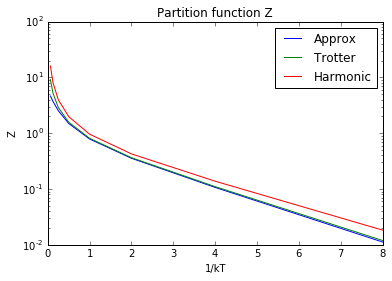

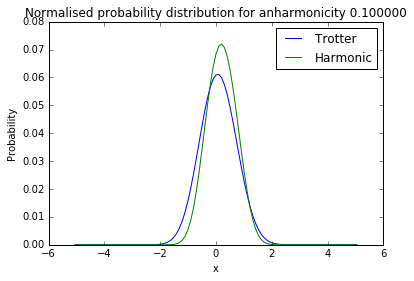

Anharmonicity = 0.200000
Z_approx(beta) = 0.008566
Z_trotter(beta) = 0.009049
Z_harm(beta) = 0.018322


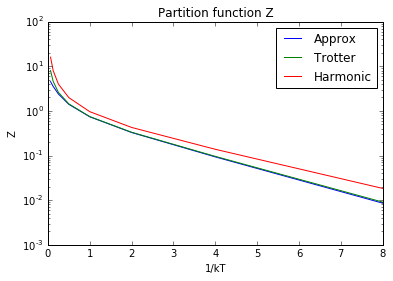

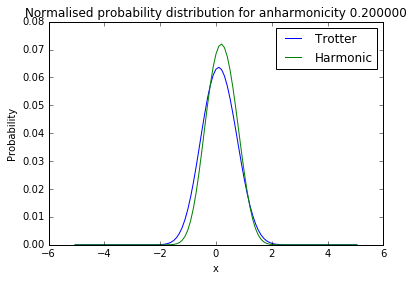

Anharmonicity = 0.300000
Z_approx(beta) = 0.008148
Z_trotter(beta) = 0.007315
Z_harm(beta) = 0.018322


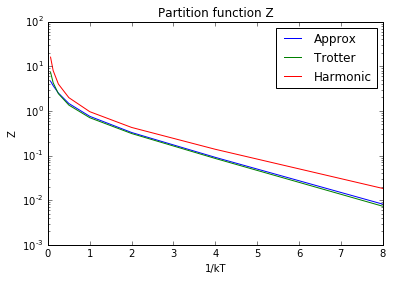

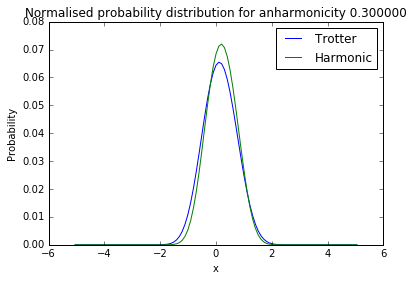

Anharmonicity = 0.400000
Z_approx(beta) = 0.009661
Z_trotter(beta) = 0.006145
Z_harm(beta) = 0.018322


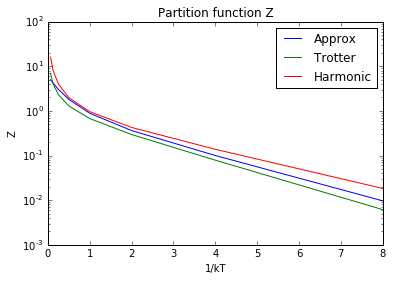

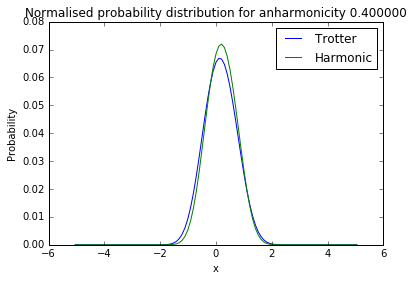

Anharmonicity = 0.500000
Z_approx(beta) = 2.133339
Z_trotter(beta) = 0.005299
Z_harm(beta) = 0.018322


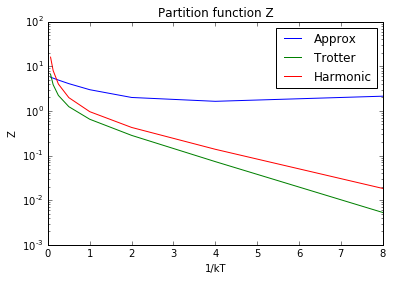

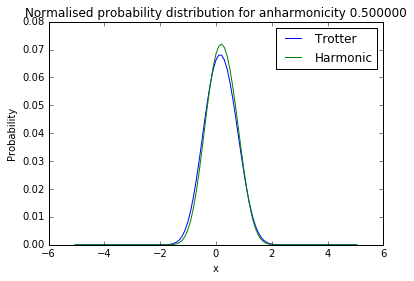

Anharmonicity = 0.600000
Z_approx(beta) = 8937022581702967924952662016.000000
Z_trotter(beta) = 0.004658
Z_harm(beta) = 0.018322


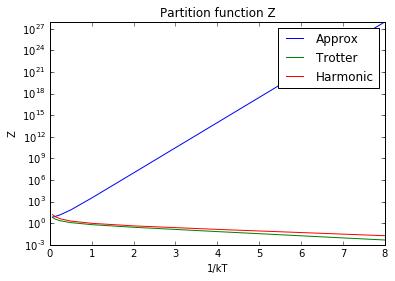

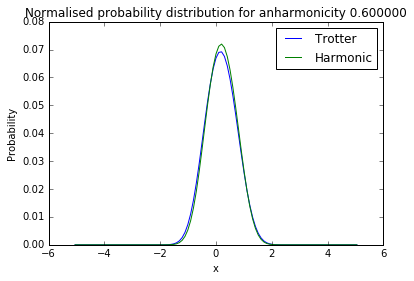

Anharmonicity = 0.700000
Z_approx(beta) = 3086812920673985230756060601244213734226453567764139195561410560.000000
Z_trotter(beta) = 0.004156
Z_harm(beta) = 0.018322


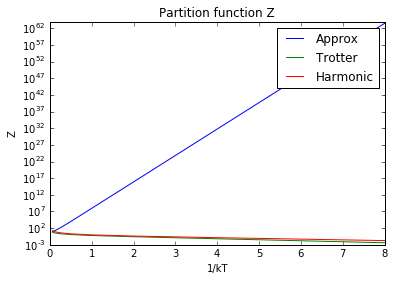

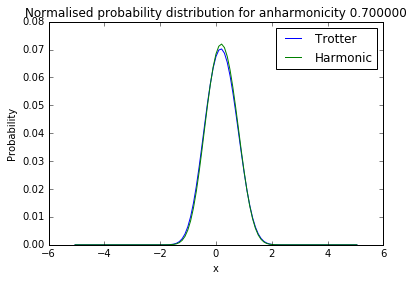

Anharmonicity = 0.800000
Z_approx(beta) = 87231476570415876805726185165364388610678913650399401896595088293417837398985458760038060216091884002476032.000000
Z_trotter(beta) = 0.003752
Z_harm(beta) = 0.018322


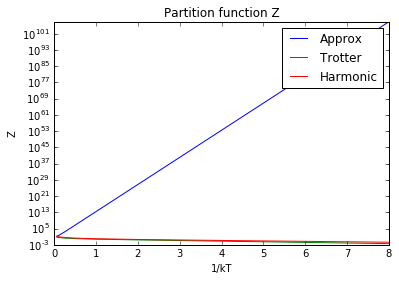

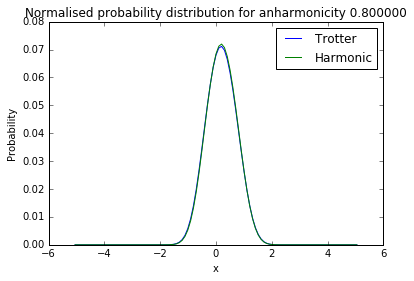

Anharmonicity = 0.900000
Z_approx(beta) = 201688714791015996508439133594715240772143135626723233951227642799938484737422906415674535396246655185946905766788835395367945016289785225869300705252643700736.000000
Z_trotter(beta) = 0.003420
Z_harm(beta) = 0.018322


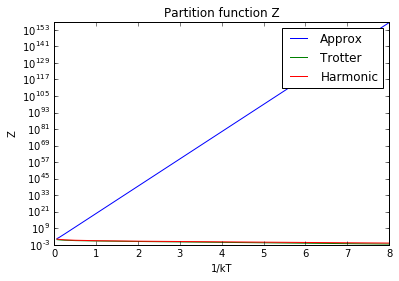

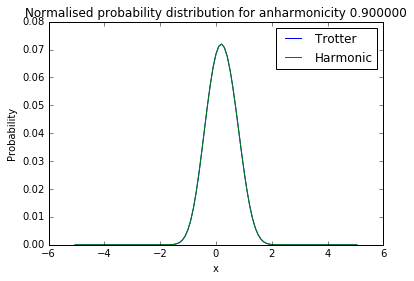

In [234]:
def V_new(x, c, q):
    return x ** 2 / 2 + c * x ** 3 + q * x ** 4

def Z_new(c, q, beta, n_max):
    return sum(math.exp(-beta * Energy(n, c, q)) for n in range(n_max + 1))

def rho_free(x, xp, beta):
    return (math.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            math.sqrt(2.0 * math.pi * beta))

def rho_trotter(grid, beta, c, q):
    return numpy.array([[rho_free(x, xp, beta) *
                         numpy.exp(-0.5 * beta * (V_new(x, c, q)+V_new(xp, c, q))) 
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)]

ratio_new = [i * 0.1 for i in xrange(1,10)]

beta_tmp = 2.0 ** (-5)
betas_new = [ beta_tmp*2**b for b in xrange(1,9)]

harmonic = [ i/sum(diagonal_rho) for i in diagonal_rho]

for r in ratio_new:
    rho = rho_trotter(x, 0.5*betas_new[0], -r, r)
    Z_trotter = []
    Z_approx = []
    
    for beta_tmp in betas_new:
        rho = numpy.dot(rho, rho)
        rho *= dx
        diagonal_rho = numpy.diag(rho)
        norm_dist = [ i/sum(diagonal_rho) for i in diagonal_rho]    
        Z_trotter.append(dx*diagonal_rho.sum())
        Z_approx.append(Z_new(-r, r, beta_tmp, 5))
    print "Anharmonicity = %f\nZ_approx(beta) = %f\nZ_trotter(beta) = %f\nZ_harm(beta) = %f"%(r, Z_new(-r, r, beta_tmp, 5), dx*numpy.diag(rho).sum(), Z_harm(beta_tmp))
    Z_analytical_new = [Z_harm(beta) for beta in betas_new]
    
    pylab.plot(betas_new, Z_approx, label='Approx')    
    pylab.plot(betas_new, Z_trotter, label='Trotter')
    pylab.plot(betas_new, Z_analytical_new, label='Harmonic')
    
    pylab.title('Partition function Z')
    pylab.xlabel('1/kT')
    pylab.ylabel('Z')
    pylab.yscale('log')
    pylab.legend(loc=1)
    pylab.show()
    
    
    pylab.plot(x, norm_dist, label='Trotter')
    pylab.plot(x, harmonic, label='Harmonic')

    pylab.title(r'Normalised probability distribution for anharmonicity %f'%(r))
    pylab.xlabel('x')
    pylab.ylabel('Probability')
    pylab.legend(loc=1)
    pylab.show()   

## C2

Write a new path-integral Monte Carlo program (see section B3). Incorporate V(x) as in section C1, then run it and produce the normalized probability $\pi(x)$ for $\beta = 2$. Compare with the output of C1. To do so, plot the results of matrix squaring, if possible together with the Monte Carlo results, in one figure. If you wish to write the matrix squaring results into a file in order to recover them in the Monte Carlo program:, you may use the following code snippet:

In [ ]:
## For writing
f = open('matrix_squaring_beta_2.txt', 'w')
for k in range(len(x)):
    f.write(str(x[k]) + ' ' + str(y_values[k]) + '\n')
f.close()

# for reading
f = open(filename, 'r')
x = []
y = []
for line in f:
    a, b = line.split()
    x.append(float(a))
    y.append(float(b))
f.close()

In [ ]:
def rho_free(x, y, beta):
    return math.exp(-(x - y) ** 2 / (2.0 * beta))


beta = 2.0
N = 8
dtau = beta / N
delta = 1.0
n_steps = 100000
x = [0.0] * N
data = []

for step in range(n_steps):
    k = random.randint(0, N - 1)
    knext, kprev = (k + 1) % N, (k - 1) % N
    x_new = x[k] + random.uniform(-delta, delta)
    old_weight = (rho_free(x[knext], x[k], dtau) *
                  rho_free(x[k], x[kprev], dtau) *
                  math.exp(-0.5 * dtau * x[k] ** 2))
    new_weight = (rho_free(x[knext], x_new, dtau) *
                  rho_free(x_new, x[kprev], dtau) *
                  math.exp(-0.5 * dtau * x_new ** 2))
    if random.uniform(0.0, 1.0) < new_weight / old_weight:
        x[k] = x_new
        data.append(x_new)
    #print x


# the histogram of the data
n, bins, patches = pylab.hist(data, 50, normed=1, facecolor='blue', alpha=0.75)

exactx = [distrib(i,beta) for i in bins]
exactx_norm = [i/sum(exactx) for i in exactx]
pylab.plot(bins, exactx_norm, label='Exact')

pylab.xlabel('Positin x')
pylab.ylabel('Probability')
pylab.title(r'Normalised probability distribution')
pylab.grid(True)
pylab.show()